1. chuong trinh cho phep nguoi dung chon cac phuong phap bien doi anh

cai dat thu vien opencv de xu ly anh

In [ ]:
pip install opencv-python matplotlib

Chọn phương pháp biến đổi ảnh:
I - Image Inverse Transformation
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching
Q - Thoát


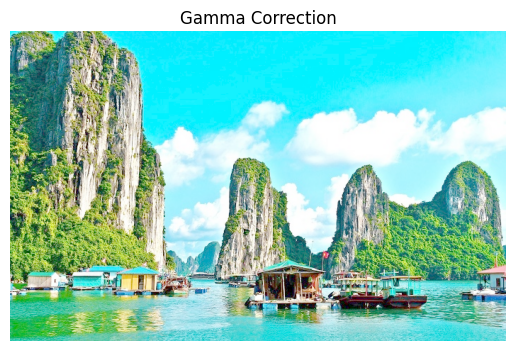

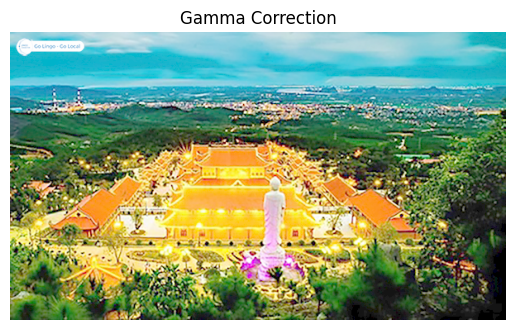

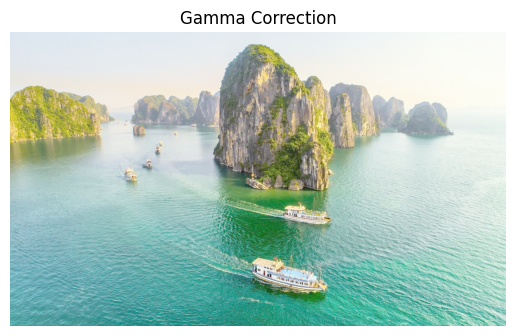

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa các hàm biến đổi ảnh
def image_inverse(image):
    return 255 - image

def gamma_correction(image, gamma=1.0):
    im_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** im_gamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

def log_transformation(image):
    c = 255 / np.log(1 + np.max(image))
    return c * np.log(1 + image).astype(np.float32)

def histogram_equalization(image):
    if len(image.shape) == 2:  # Hình ảnh xám
        return cv2.equalizeHist(image)
    else:  # Hình ảnh màu
        ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * (255 / (max_val - min_val))
    return np.clip(stretched, 0, 255).astype(np.uint8)

# Hàm hiển thị ảnh
def show_image(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def main():
    # Thư mục chứa ảnh
    folder_path = 'exercise'
    images = [f for f in os.listdir(folder_path) if f.endswith(('quang_ninh.jpg', 'ha_long_bay.jpg', 'pagoda.jpg'))]

    print("Chọn phương pháp biến đổi ảnh:")
    print("I - Image Inverse Transformation") # Biến đổi ảnh ngược
    print("G - Gamma Correction") # Hiệu chỉnh gamma
    print("L - Log Transformation") # Biến đổi log
    print("H - Histogram Equalization") # Cân bằng histogram
    print("C - Contrast Stretching") # Kéo giãn độ tương phản
    print("Q - Thoát")

    while True:
        choice = input("Nhập lựa chọn của bạn: ").upper()

        if choice == 'Q':
            break

        for image_name in images:
            image_path = os.path.join(folder_path, image_name)
            image = cv2.imread(image_path)

            if choice == 'I':
                transformed_image = image_inverse(image)
                show_image(transformed_image, "Image Inverse")

            elif choice == 'G':
                transformed_image = gamma_correction(image, gamma=2.2)
                show_image(transformed_image, "Gamma Correction")

            elif choice == 'L':
                transformed_image = log_transformation(image)
                show_image(transformed_image, "Log Transformation")

            elif choice == 'H':
                transformed_image = histogram_equalization(image)
                show_image(transformed_image, "Histogram Equalization")

            elif choice == 'C':
                transformed_image = contrast_stretching(image)
                show_image(transformed_image, "Contrast Stretching")

            else:
                print("Lựa chọn không hợp lệ. Vui lòng thử lại.")

if __name__ == "__main__":
    main()